In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
X, y = mglearn.datasets.load_extended_boston()
# boston = load_boston()

# print("Boston keys : {}".format(boston.keys()))
# print("Target shape : {}".format(boston["target"].shape))
# print("Feature names : {}".format(boston["feature_names"]))
# print("Data shape : {}".format(boston["data"].shape))
# print("First 10 of data : {}".format(boston["data"][:10]))

C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

ln = LinearRegression().fit(X_train, y_train)

print("First 5 of y_train : {}".format(y_train[:5]))
print("Score training : {}".format(ln.score(X_train, y_train)))
print("Score testing : {}".format(ln.score(X_test, y_test)))

First 5 of y_train : [18.5 19.6 33.2 13.1  7.5]
Score training : 0.9520519609032727
Score testing : 0.6074721959665943


Score training -lasso- : 0.29323768991114607
Score testing -lasso- : 0.20937503255272294
Number of features -lasso- used : 4
Intercept : 26.124530144985922

Score training -lasso001 : 0.8962226511086497
Score testing -lasso001 : 0.7656571174549982
Number of features -lasso001 used : 33
Intercept : 20.47637168564111

Score training -lasso00001 : 0.9507158754515463
Score testing -lasso00001 : 0.6437467421272821
Number of features -lasso00001 used : 96
Intercept : 8.54710387862557

Score training -ridge01 : 0.9282273685001986
Score testing -ridge01 : 0.7722067936479653
Number of features -ridge01 used : 104
Intercept : 11.119688524320411



Text(0, 0.5, 'Coefficient magnitude')

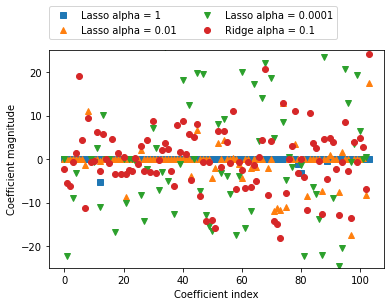

In [5]:
lasso = Lasso().fit(X_train, y_train)
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

def show(models, name):
    print("Score training {} : {}".format(name, models.score(X_train, y_train)))
    print("Score testing {} : {}".format(name, models.score(X_test, y_test)))
    print("Number of features {} used : {}".format(name, np.sum(models.coef_ != 0)))
    print("Intercept : {}".format(models.intercept_))
    print()

show(lasso, "-lasso-")
show(lasso001, "-lasso001")
show(lasso00001, "-lasso00001")
show(ridge01, "-ridge01")

plt.plot(lasso.coef_, "s", label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, "^", label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label = "Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, "o", label = "Ridge alpha = 0.1")

plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")